<a href="https://colab.research.google.com/github/amalvarezme/AnaliticaDatos/blob/master/MLtests/main_bci2a_Keras_CKA_CSP_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

\begin{equation}
A^* = \arg \max_A {\rm{cka}}\left(K_x(A),K_L\right)\\
\rm{s.t.} \quad \|a_i\|_{1,2} \leq \xi \\
\quad \quad A^\top A \leq \xi I \\
\end{equation}

\begin{equation}
\kappa_X(x_n,x_n'| A) = \mathcal{N}\left(x_n| x_n', \Sigma^{-1}=A A^\top\right) = exp(-\frac{(x_n-x_n')AA^\top(x_n-x_n')^\top}{2})
\end{equation}



caso: 0 Raw

$Z_n\in \mathbb{R}^{C\times T}$;

$x_n\in \mathbb{R}^{(C\times T)}$; 


caso 1: csp

$x_n\in \mathbb{R}^Q$; $Q\leq C$

$Z_n\in \mathbb{R}^{C\times T}$;

$x_n = \log(\rm{diag}((Z_n^\top A_{csp})^\top Z_n^\top A_{csp}))$

$A \in \mathbb{R}^{C \times Q}$


caso 2: kernel compuesto

$x_n = \{ \kappa_z(z^c_n, z^{c'}_n)\in \mathbb{R}\}^C_{c,c'=1; c\neq c'}\in \mathbb{R}^{C(C-1)/2}$

Caso 2.1 correlación

$\kappa_z(z^c_n, z^{c'}_n) = {z^c_n}^\top z^{c'}_{n} \in \mathbb{R}^{C\times C}$

Caso 2.2 Gaussiano

$\kappa_z(z_n, z_{n'}) = \mathcal{N}\left(z_n|z_n;\sigma^2_z I\right)$

In [0]:
#%% download functions
FILEID = "1bL8OCrOZx1V2PaEYh37UTyJ6PszL96jf"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!pip install mne==0.19

--2020-05-01 00:44:34--  https://docs.google.com/uc?export=download&confirm=&id=1bL8OCrOZx1V2PaEYh37UTyJ6PszL96jf
Resolving docs.google.com (docs.google.com)... 172.217.11.174, 2607:f8b0:4007:800::200e
Connecting to docs.google.com (docs.google.com)|172.217.11.174|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-9c-docs.googleusercontent.com/docs/securesc/i4o9lb9612mij5qsl1hg5jnrju8nff5h/1v8koa2qonu0h5hni3qmalqhg7c421f4/1588293825000/06932581800131476027/10847764722379045145Z/1bL8OCrOZx1V2PaEYh37UTyJ6PszL96jf?e=download [following]
--2020-05-01 00:44:35--  https://doc-0s-9c-docs.googleusercontent.com/docs/securesc/i4o9lb9612mij5qsl1hg5jnrju8nff5h/1v8koa2qonu0h5hni3qmalqhg7c421f4/1588293825000/06932581800131476027/10847764722379045145Z/1bL8OCrOZx1V2PaEYh37UTyJ6PszL96jf?e=download
Resolving doc-0s-9c-docs.googleusercontent.com (doc-0s-9c-docs.googleusercontent.com)... 172.217.14.65, 2607:f8b0:4007:803::2001
Connecting to doc-0s-9c-

In [0]:
#%% download data
FILEID = "1b751JA_uYQ0W6Nd90hpIlZzoW0ea3aD7"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir

--2020-05-01 00:44:47--  https://docs.google.com/uc?export=download&confirm=oyQK&id=1b751JA_uYQ0W6Nd90hpIlZzoW0ea3aD7
Resolving docs.google.com (docs.google.com)... 172.217.11.174, 2607:f8b0:4007:804::200e
Connecting to docs.google.com (docs.google.com)|172.217.11.174|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-7s-docs.googleusercontent.com/docs/securesc/9a63e2amltsbr47pujo26nndevtlch3m/5n9od6lncrgr6pjirps822ssdejrok0r/1588293825000/06932581800131476027/15888898845459594522Z/1b751JA_uYQ0W6Nd90hpIlZzoW0ea3aD7?e=download [following]
--2020-05-01 00:44:47--  https://doc-0g-7s-docs.googleusercontent.com/docs/securesc/9a63e2amltsbr47pujo26nndevtlch3m/5n9od6lncrgr6pjirps822ssdejrok0r/1588293825000/06932581800131476027/15888898845459594522Z/1b751JA_uYQ0W6Nd90hpIlZzoW0ea3aD7?e=download
Resolving doc-0g-7s-docs.googleusercontent.com (doc-0g-7s-docs.googleusercontent.com)... 172.217.14.65, 2607:f8b0:4007:803::2001
Connecting to doc-0g

In [0]:
# import python packages
import sys
from sklearn.preprocessing import StandardScaler
from joblib import dump, load
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import pairwise_distances
from mne.viz import plot_topomap
from keras_cka import Keras_CKA # import keras_cka function wrapped for sklearn.
from MIfunctions import * #importar todas las funciones de manejo de eeg con mne.
import os
os.makedirs('results/',exist_ok=True)
os.makedirs('figures/',exist_ok=True)

KeyboardInterrupt: ignored

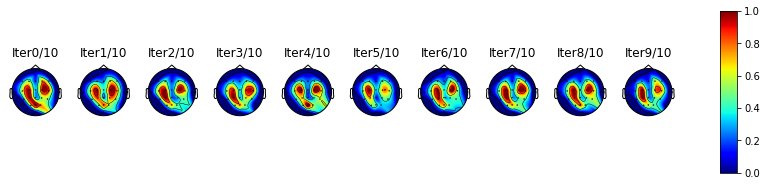

In [0]:
#%% loading subjet data
device_name = tf.test.gpu_device_name()
for sbj in range(9):
  sbj += 1
  name = './data/A0' + str(sbj)
  filename_train = name+'T.gdf'
  Ch = np.arange(0,22)# range of channels
  clases = [769,770] # left and right class
  vt = [-1,3.5] #analisys window
  i_muestras, i_clases, raw, Xraw, y, ni,m = leer_bci42a_train_full(filename_train,clases,Ch,vt)
  fs = raw.info['sfreq'] #sample frequency
  #channel montage
  channels_names = ['Fz','FC3','FC1','FCz','FC2','FC4',
                  'C5','C3','C1','Cz','C2','C4','C6',
                  'CP3','CP1','CPz','CP2','CP4',
                    'P1','Pz','P2',
                    'POz']
  montage = mne.channels.read_montage('standard_1020', channels_names)
  info = mne.create_info(channels_names, sfreq=fs, ch_types="eeg",
                            montage=montage)
  #prueba en pipeline de clasificacion
  f_frec = np.array([[1,4],[4,8],[8,12],[12,30],[8,30]])

  steps = [ ('rep', CSP_epochs_filter_extractor(fs=fs,f_frec=f_frec)),
          ('scaler', StandardScaler()), #estandarizar
          ('proy', Keras_CKA(epochs=200,batch_size=30,learning_rate=1e-3, optimizer='Adam',
                  validation_split=0.2,verbose=0)), #proyeccion 
          #('cla',  KNeighborsClassifier())] #clasificador 
            ('cla',  GaussianNB())] #clasificador 

  method = Pipeline(steps)          

  #parametros a buscar por busqueda por grilla
  parameters = {'rep__ncomp':[8],
                'proy__Q':[0.5,0.7,0.9],
                'proy__l1_param':[0,0.1,0.5],
                'proy__l2_param':[0,0.1,0.5]}
  #valildacion cruzada anidada
  Niter = 10 #numero particiones
  acc =np.zeros(Niter)#arreglo para guardar acierto
  Nc = len(np.unique(y))
  cmc = np.zeros((Niter,Nc,Nc))#arreglo para guarda matrices de confusion
  best_estimators = []#mejor metodo por iteracion
  best_parameters = []#mejor metodo por iteracion
  Acka =[]
  rhocka=[]
  for j in range(Niter):
    X_train, X_test, y_train, y_test = train_test_split(Xraw,y,test_size=0.2, stratify=y)
    grid_search = GridSearchCV(method, parameters,cv=5,verbose=10,scoring='accuracy',n_jobs=2)
    #generar mejor modelo
    grid_search.fit(X_train,y_train)
    #estimar salida conjunto de test
    y_pred = grid_search.best_estimator_.predict(X_test)
    #guardar mejor modelo
    #best_estimators.append(grid_search.best_estimator_)
    best_parameters.append(grid_search.best_params_)
    Acka.append(grid_search.best_estimator_['proy'].A)
    #guardar acierto
    acc[j] = 100*accuracy_score(y_test,y_pred)
    #estimar matriz de confusion
    cm = confusion_matrix(y_test, y_pred)
    cm = 100*cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cmc[j] = cm
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    l = np.asmatrix(y_train).T == np.asmatrix(y_train)
    batch = l.shape[0]
    h = np.eye(batch) - (1.0/batch)*np.ones([batch,1])*np.ones([1,batch])
    Wcka=[]
    cka=grid_search.best_estimator_['proy']
    Xtr = grid_search.best_estimator_[0:2].transform(X_train)
    for q in np.arange(cka.A.shape[1]):
      yy = Xtr.dot(cka.A[:,q])
      d  = pairwise_distances(yy.reshape(-1,1))
      k  = np.e**(-.5*d**2) #calculo del kernel
      trkl = np.trace(k.dot(h).dot(l).dot(h))
      trkk = np.trace(k.dot(h).dot(k).dot(h))
      trll = np.trace(l.dot(h).dot(l).dot(h))
      Wcka.append(trkl/np.sqrt(trkk*trll))
    Wcka = np.asarray(Wcka)
    ncp = grid_search.best_estimator_[0].ncomp
    macka = np.abs(cka.A).dot(Wcka)#.reshape((ncp,-1))
    filters = grid_search.best_estimator_[0].filters
    filters = np.abs(np.moveaxis(filters,1,-1).reshape((-1,Xraw.shape[1])))
    ba = filters.T.dot(macka)
    ba -= ba.min()
    ba /= ba.max()
    rhocka.append(ba)

    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    print('it %d/%d'%(j+1,Niter))
    print(grid_search.best_params_)
    print('acc:',acc[j])
    print('confusionmatrix \n',cmc[j])
    savedata = {
        'acc':acc,
        'confusionmatrix':cmc,
        #'best_models':best_estimators,
        'Acka':Acka,
        'rhocka':rhocka,
        'steps':steps,
        'best_parameters':best_parameters
          } 
    dump(savedata,'results/sujeto_'+str(sbj)+'_cka_featuresCSP_BCI2a.joblib')
  f,ax = plt.subplots(1,Niter,figsize=(12,3))
  cmap='jet'
  for jj in range(Niter):
      plot_topomap(rhocka[jj], info, axes=ax[jj], show=False,cmap=cmap,vmin=0,vmax=1)
      ax[jj].set_title('Iter'+str(jj)+'/'+str(Niter))
  cax = f.add_axes([0.95, 0.15, 0.02, 0.75])
  norm = matplotlib.colors.Normalize(vmin=0,vmax=1)
  sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
  sm.set_array([])
  plt.colorbar(sm,cax=cax)
  plt.savefig('figures/sujeto_'+str(sbj)+'_cka_featuresCSP_BCI2a.png',format='png',dpi=300)